This notebook require an installation of "lazypredict-nightly", which can be install as follows in a conda environment as follows:
- conda create --n ML python=3.9
- conda activate ML
- pip install lazypredict-nightly
- pip install openpyxl

In [90]:
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

In [91]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

# Set font properties for ticks
plt.rcParams['xtick.labelsize'] = 12  # Font size of x-axis tick labels
plt.rcParams['ytick.labelsize'] = 12  # Font size of y-axis tick labels

# Set font properties for labels
plt.rcParams['axes.labelsize'] = 15  # Font size of axis labels

# Set font properties for title
plt.rcParams['axes.titlesize'] = 17  # Font size of title
# plt.rcParams["font.family"] = 'Helvetica'

In [92]:
import os

os.getcwd()

'/home/rimella/PythonDirectory/Postdoc/ML_tunneling/ML_tunneling'

In [93]:
data = pd.read_excel("data/training.xlsx")

data = data.values[:,1:]

X = data[:,:-1].astype(float)

y = data[:,-1]

y = np.where(y=="E",      np.zeros(y.shape), y)
y = np.where(y=="L",  1 + np.zeros(y.shape), y)
y = np.where(y=="L ", 1 + np.zeros(y.shape), y)
y = np.where(y=="R",  2 + np.zeros(y.shape), y)
y = np.where(y=="S",  3 + np.zeros(y.shape), y)
y = np.where(y=="W",  4 + np.zeros(y.shape), y)

y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Lazy predict for model selection

In [94]:
from lazypredict import LazyClassifier

In [95]:
# Updated Line
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=True)

X_train_lazy, X_test_lazy, y_train_lazy, y_test_lazy = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

models, predictions = clf.fit(X_train_lazy, X_test_lazy, y_train_lazy, y_test_lazy)
models

 93%|█████████▎| 27/29 [00:02<00:00, 10.62it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000371 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 3171, number of used features: 9
[LightGBM] [Info] Start training from score -1.024775
[LightGBM] [Info] Start training from score -1.285295
[LightGBM] [Info] Start training from score -3.217615
[LightGBM] [Info] Start training from score -1.605033
[LightGBM] [Info] Start training from score -2.090540
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:04<00:00,  6.71it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,0.93,0.90,None,0.93,1.19
LGBMClassifier,0.92,0.90,None,0.92,0.24
ExtraTreesClassifier,0.93,0.90,None,0.93,0.23
RandomForestClassifier,0.92,0.89,None,0.92,0.60
BaggingClassifier,0.90,0.87,None,0.90,0.16
LabelPropagation,0.89,0.85,None,0.89,0.40
LabelSpreading,0.89,0.85,None,0.89,0.44
DecisionTreeClassifier,0.87,0.83,None,0.87,0.03
ExtraTreeClassifier,0.85,0.82,None,0.85,0.01


# XGB Classifier

In [96]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [97]:
booster_list = ["gbtree"]

n_estimators_list  = [25, 50, 100, 150]

eta_list = [0.01, 0.1, 1.]
max_depth_list = [5, 10, 30]

lambda_list = [0.0, 5.0, 10.]

max_leaves_list   = [0, 1, 5]

# accuracy_vector = -100 + np.zeros((len(booster_list), len(n_estimators_list), len(eta_list), len(max_depth_list), 
#                                    len(lambda_list), len(max_leaves_list) ))

# for i1 in range(len(booster_list)):
#     for i2 in range(len(n_estimators_list)):
#         for i3 in range(len(eta_list)):
#             for i4 in range(len(max_depth_list)):
#                 for i5 in range(len(lambda_list)):
#                         for i7 in range(len(max_leaves_list)):

#                                 clf = XGBClassifier(booster = booster_list[i1], 
#                                                     n_estimators = n_estimators_list[i2], 
#                                                     eta = eta_list[i3], 
#                                                     max_depth = max_depth_list[i4], 
#                                                     reg_lambda = lambda_list[i5], 
#                                                     max_leaves = max_leaves_list[i7],  
#                                                     random_state = 42)
                                
#                                 model = clf.fit(X_train, y_train)

#                                 # Predict the labels for the test set
#                                 y_pred = model.predict(X_test)

#                                 # Calculate accuracy
#                                 accuracy_vector[i1, i2, i3, i4, i5, i7] = accuracy_score(y_test, y_pred)

#                                 print("#####################")
#                                 print("booster ", booster_list[i1])
#                                 print("n_estimators ", n_estimators_list[i2])
#                                 print("eta ", eta_list[i3])
#                                 print("max_depth ", max_depth_list[i4])
#                                 print("lambda ", lambda_list[i5])
#                                 print("max_leaves ", max_leaves_list[i7])
#                                 print(accuracy_vector[i1, i2, i3, i4, i5, i7])

# np.save("accuracy_XGB.npy", accuracy_vector)

In [98]:
accuracy_vector_XGB = np.load("data/accuracy_XGB.npy")
max_index = np.unravel_index(np.argmax(accuracy_vector_XGB), accuracy_vector_XGB.shape)

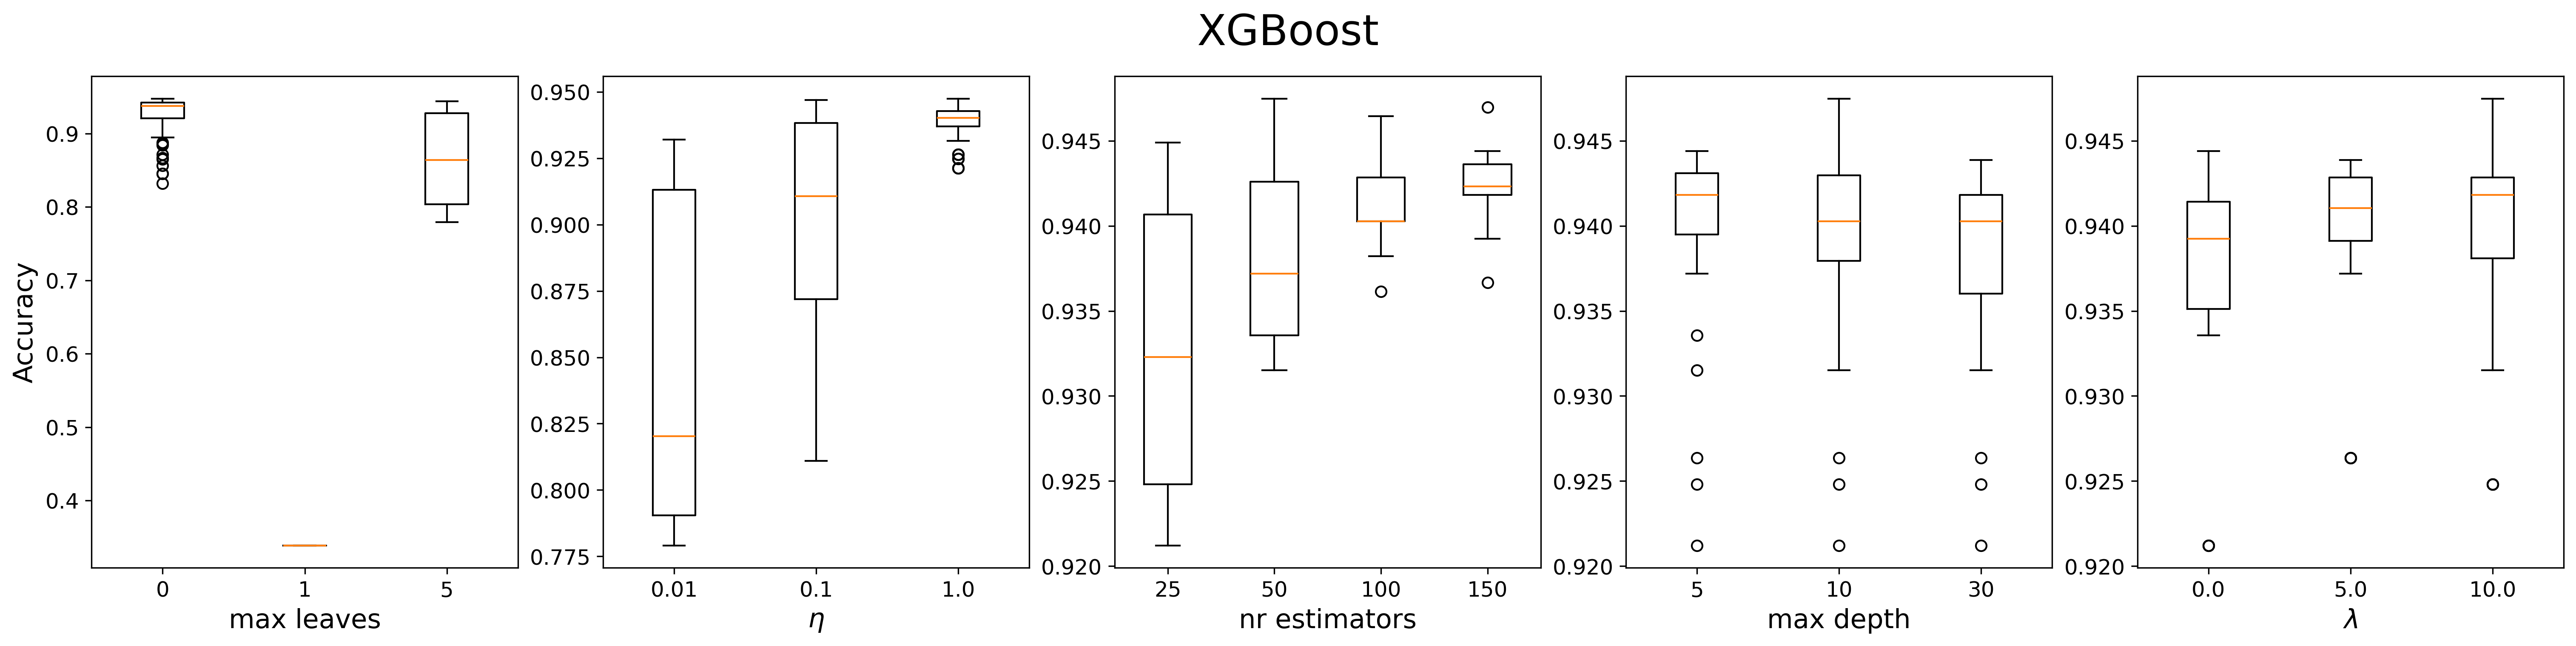

In [99]:
fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize = (25, 5), dpi=300)

fig.suptitle('XGBoost', fontsize = 24)
	     
boxplot_5 = []
for i in range(accuracy_vector_XGB.shape[5]):
    boxplot_5.append(np.matrix.flatten(accuracy_vector_XGB[0,:,:,:,:,i]))
ax[0].boxplot(boxplot_5, labels = max_leaves_list)
ax[0].set_ylabel("Accuracy")
ax[0].set_xlabel("max leaves")
# ax[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

boxplot_2 = []
for i in range(accuracy_vector_XGB.shape[2]):
    boxplot_2.append(np.matrix.flatten(accuracy_vector_XGB[0,:,i,...,[0,2]]))
ax[1].boxplot(boxplot_2, labels = eta_list)
# ax[1].set_ylabel("Accuracy")
ax[1].set_xlabel(r"$\eta$")
# ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

boxplot_1 = []
for i in range(accuracy_vector_XGB.shape[1]):
    boxplot_1.append(np.matrix.flatten(accuracy_vector_XGB[0,i,2,...,[0,2]]))
ax[2].boxplot(boxplot_1, labels = n_estimators_list)
ax[2].set_xlabel(r"nr estimators")
# ax[2].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

boxplot_3 = []
for i in range(accuracy_vector_XGB.shape[3]):
    boxplot_3.append(np.matrix.flatten(accuracy_vector_XGB[0,:,2,i,...,[0,2]]))
ax[3].boxplot(boxplot_3, labels = max_depth_list)
ax[3].set_xlabel(r"max depth")
# ax[3].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

boxplot_4 = []
for i in range(accuracy_vector_XGB.shape[4]):
    boxplot_4.append(np.matrix.flatten(accuracy_vector_XGB[0,:,2,:,i,...,[0,2]]))
ax[4].boxplot(boxplot_4, labels = lambda_list)
ax[4].set_xlabel(r"$\lambda$")
# ax[4].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

fig.savefig('data/figures/boxplots_XGB.png', bbox_inches="tight", dpi = 300)

In [100]:
clf_XGB = XGBClassifier(booster = booster_list[max_index[0]], 
                    n_estimators = n_estimators_list[max_index[1]], 
                    eta = eta_list[max_index[2]], 
                    max_depth = max_depth_list[max_index[3]], 
                    reg_lambda = lambda_list[max_index[4]], 
                    max_leaves = max_leaves_list[max_index[5]],  )

XGB = clf_XGB.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = XGB.predict(X_test)
accuracy_score(y_test, y_pred)

0.9474768280123584

# ExtraTreesClassifier	

In [101]:
from sklearn.ensemble import ExtraTreesClassifier

In [102]:
n_estimators_list  = [25, 50, 100, 150]

min_samples_split_list = [2, 5, 10]
max_depth_list = [5, 10, 20, 30]

min_samples_leaf_list = [1, 2, 5]
criterion_list  = ["gini", "entropy"]


# accuracy_vector_extra_tree = -100 + np.zeros((len(n_estimators_list), len(min_samples_split_list), len(max_depth_list), 
#                                               len(min_samples_leaf_list), len(criterion_list) ))

# for i1 in range(len(n_estimators_list)):
#     for i2 in range(len(min_samples_split_list)):
#         for i3 in range(len(max_depth_list)):
#             for i4 in range(len(min_samples_leaf_list)):
#                 for i5 in range(len(criterion_list)):

#                                 clf = ExtraTreesClassifier( n_estimators = n_estimators_list[i1], 
#                                                             min_samples_split = min_samples_split_list[i2], 
#                                                             max_depth = max_depth_list[i3], 
#                                                             min_samples_leaf = min_samples_leaf_list[i4], 
#                                                             criterion = criterion_list[i5],  
#                                                             random_state = 42)
                                
#                                 model = clf.fit(X_train, y_train)

#                                 # Predict the labels for the test set
#                                 y_pred = model.predict(X_test)

#                                 # Calculate accuracy
#                                 accuracy_vector_extra_tree[i1, i2, i3, i4, i5] = accuracy_score(y_test, y_pred)

#                                 print("#####################")
#                                 print("n_estimators", n_estimators_list[i1])
#                                 print("min_samples_split", min_samples_split_list[i2])
#                                 print("max_depth", max_depth_list[i3])
#                                 print("min_samples_leaf", min_samples_leaf_list[i4])
#                                 print("criterion", criterion_list[i5])
#                                 print(accuracy_vector_extra_tree[i1, i2, i3, i4, i5])

# np.save("accuracy_ExtraTree.npy", accuracy_vector_extra_tree)

In [103]:
accuracy_vector_ExtraTree = np.load("data/accuracy_ExtraTree.npy")
max_index = np.unravel_index(np.argmax(accuracy_vector_ExtraTree), accuracy_vector_ExtraTree.shape)

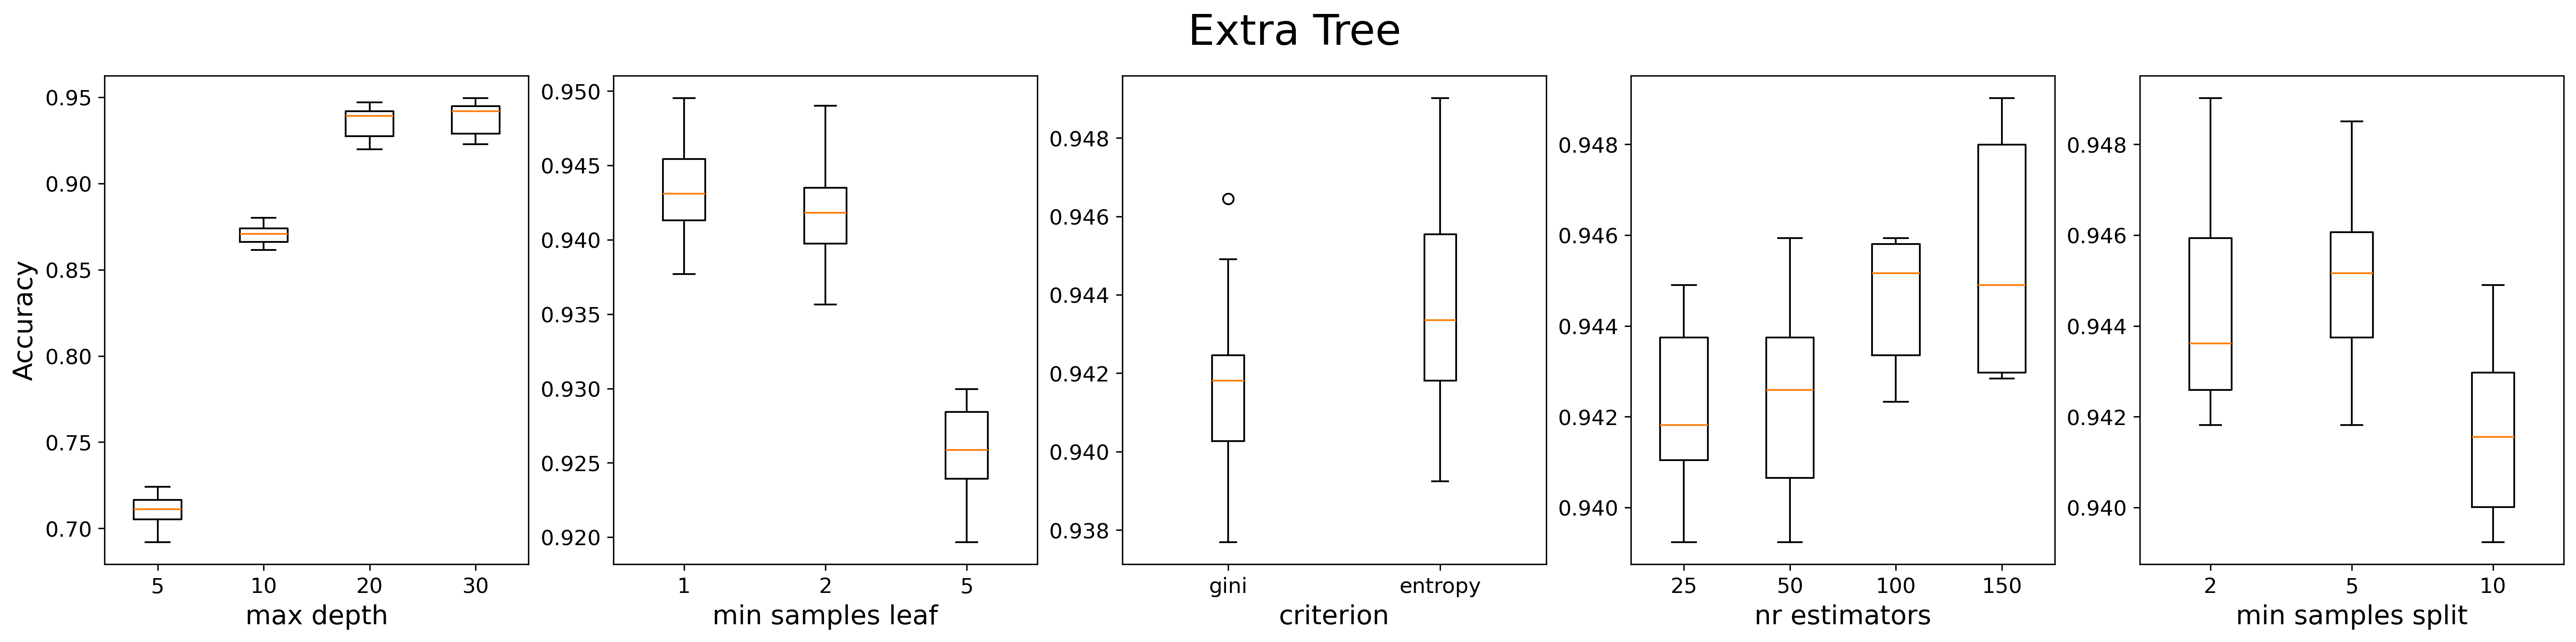

In [104]:
fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize = (25, 5), dpi=300)

fig.suptitle('Extra Tree', fontsize = 24)

ax[0].set_ylabel("Accuracy")

boxplot_3 = []
for i in range(accuracy_vector_ExtraTree.shape[2]):
    boxplot_3.append(np.matrix.flatten(accuracy_vector_ExtraTree[:,:,i,:,:]))
ax[0].boxplot(boxplot_3, labels = max_depth_list)
ax[0].set_xlabel(r"max depth")

boxplot_4 = []
for i in range(accuracy_vector_ExtraTree.shape[3]):
    boxplot_4.append(np.matrix.flatten(accuracy_vector_ExtraTree[:,:,[2,3],i,:]))
ax[1].boxplot(boxplot_4, labels = min_samples_leaf_list)
ax[1].set_xlabel(r"min samples leaf")

boxplot_5 = []
for i in range(accuracy_vector_ExtraTree.shape[4]):
    boxplot_5.append(np.matrix.flatten(accuracy_vector_ExtraTree[:,:,[2,3],[0,1],i]))
ax[2].boxplot(boxplot_5, labels = criterion_list)
ax[2].set_xlabel("criterion")

boxplot_1 = []
for i in range(accuracy_vector_ExtraTree.shape[0]):
    boxplot_1.append(np.matrix.flatten(accuracy_vector_ExtraTree[i,:,[2,3],[0,1],1]))
ax[3].boxplot(boxplot_1, labels = n_estimators_list)
ax[3].set_xlabel(r"nr estimators")

boxplot_2 = []
for i in range(accuracy_vector_ExtraTree.shape[1]):
    boxplot_2.append(np.matrix.flatten(accuracy_vector_ExtraTree[:,i,[2,3],[0,1],1]))
ax[4].boxplot(boxplot_2, labels = min_samples_split_list)
ax[4].set_xlabel(r"min samples split")

fig.savefig('data/figures/boxplots_ExtraTree.png', bbox_inches="tight", dpi = 300)

In [105]:
clf_ExtraTree = ExtraTreesClassifier( n_estimators = n_estimators_list[max_index[0]], 
                            min_samples_split = min_samples_split_list[max_index[1]], 
                            max_depth = max_depth_list[max_index[2]], 
                            min_samples_leaf = min_samples_leaf_list[max_index[3]], 
                            criterion = criterion_list[max_index[4]],  )

ExtraTree = clf_ExtraTree.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = ExtraTree.predict(X_test)

# Calculate accuracy
accuracy_score(y_test, y_pred)

0.9485066941297632

# LGBM Classifier

In [106]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

In [107]:
num_leaves_list  = [10, 30 , 50]

n_estimators_list  = [25, 50, 100, 150]

learning_rate_list  = [0.01, 0.1, 1]
max_depth_list = [5, 10, 20, 30]

lambda_list = [0.0, 1.0, 5.0]
boosting_type_list  = ["gbdt"]

# accuracy_vector = -100 + np.zeros((len(num_leaves_list), len(n_estimators_list), len(learning_rate_list), len(max_depth_list), 
#                                    len(lambda_list), len(boosting_type_list) ))

# for i1 in range(len(num_leaves_list)):
#     for i2 in range(len(n_estimators_list)):
#         for i3 in range(len(learning_rate_list)):
#             for i4 in range(len(max_depth_list)):
#                 for i5 in range(len(lambda_list)):
#                     for i6 in range(len(boosting_type_list)):

#                                 clf = LGBMClassifier(num_leaves = num_leaves_list[i1], 
#                                                     n_estimators = n_estimators_list[i2], 
#                                                     learning_rate = learning_rate_list[i3], 
#                                                     max_depth = max_depth_list[i4], 
#                                                     reg_lambda = lambda_list[i5], 
#                                                     boosting_type = boosting_type_list[i6],   
#                                                     random_state=42)
                                
#                                 model = clf.fit(X_train, y_train)

#                                 # Predict the labels for the test set
#                                 y_pred = model.predict(X_test)

#                                 # Calculate accuracy
#                                 accuracy_vector[i1, i2, i3, i4, i5, i6] = accuracy_score(y_test, y_pred)

#                                 print("#####################")
#                                 print("booster ", boosting_type_list[i6])
#                                 print("n_estimators ", n_estimators_list[i2])
#                                 print("learning rate ", learning_rate_list[i3])
#                                 print("max_depth ", max_depth_list[i4])
#                                 print("lambda ", lambda_list[i5])
#                                 print("num_leaves ", num_leaves_list[i1])
#                                 print(accuracy_vector[i1, i2, i3, i4, i5, i6])

# np.save("accuracy_LGBM.npy", accuracy_vector)

In [108]:
accuracy_vector_LGBM = np.load("data/accuracy_LGBM.npy")
max_index = np.unravel_index(np.argmax(accuracy_vector_LGBM), accuracy_vector_LGBM.shape)

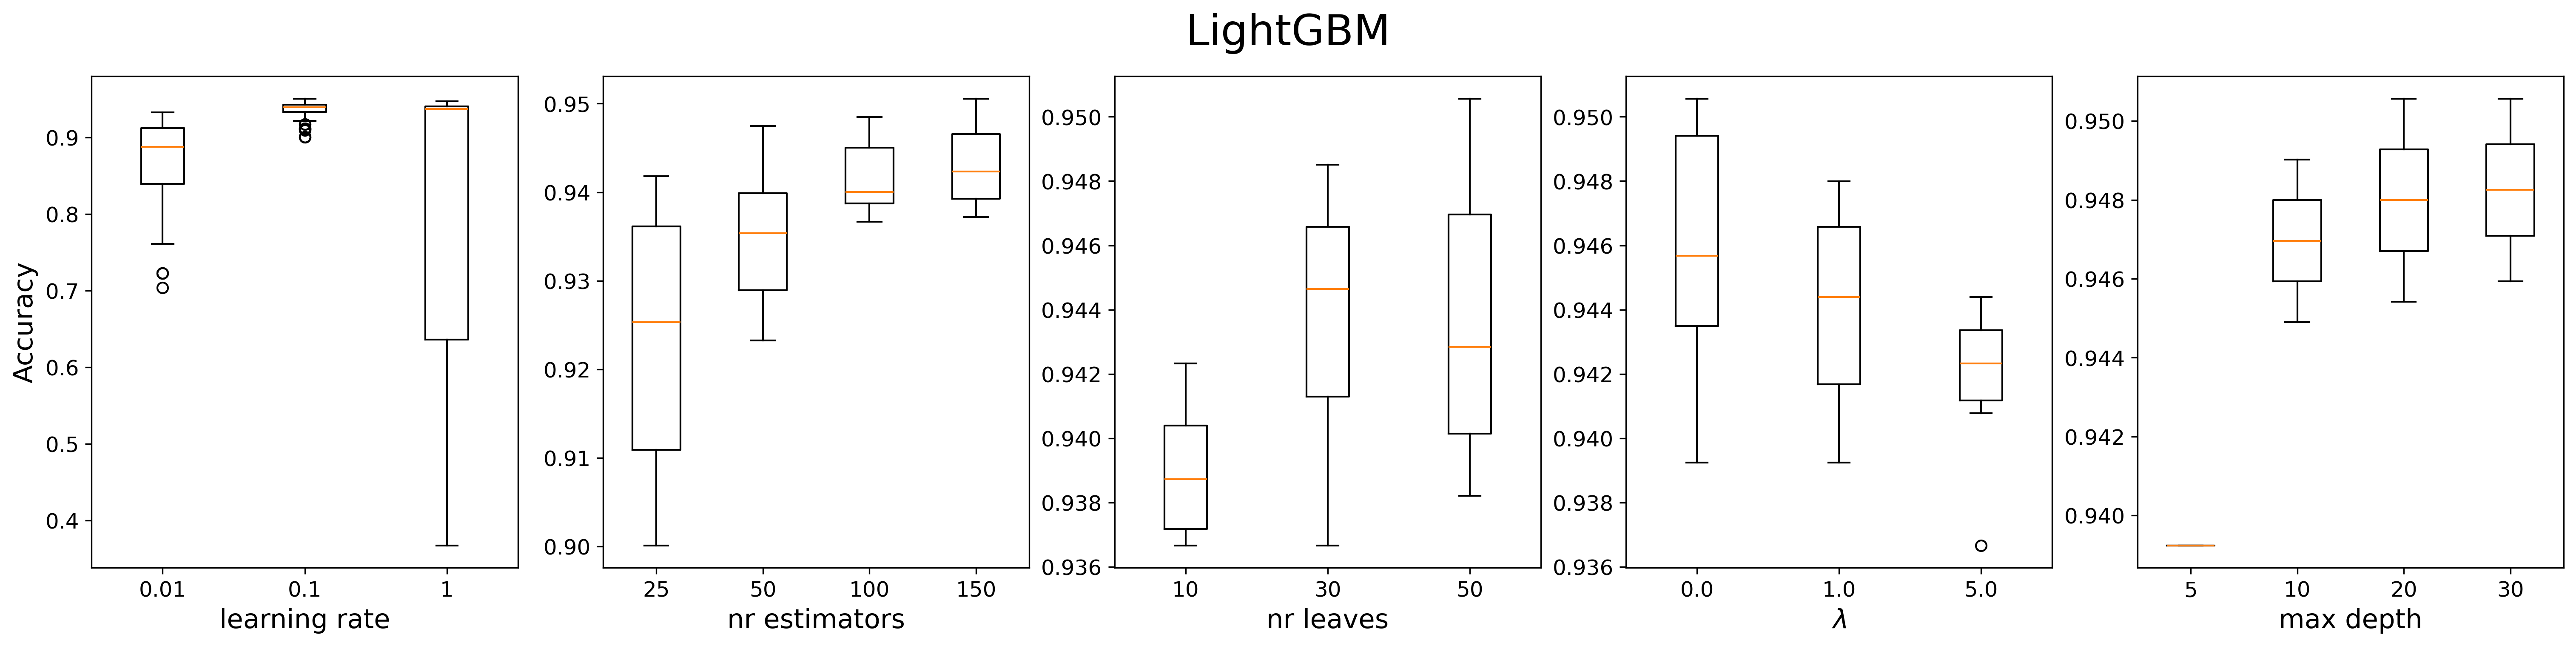

In [109]:
fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize = (25, 5), dpi=300)

fig.suptitle('LightGBM', fontsize = 24)

ax[0].set_ylabel("Accuracy")

boxplot_3 = []
for i in range(accuracy_vector_LGBM.shape[2]):
    boxplot_3.append(np.matrix.flatten(accuracy_vector_LGBM[:,:,i,:,:,0]))
ax[0].boxplot(boxplot_3, labels = learning_rate_list)
ax[0].set_xlabel(r"learning rate")

boxplot_2 = []
for i in range(accuracy_vector_LGBM.shape[1]):
    boxplot_2.append(np.matrix.flatten(accuracy_vector_LGBM[:,i,1,:,:,0]))
ax[1].boxplot(boxplot_2, labels = n_estimators_list)
ax[1].set_xlabel(r"nr estimators")

boxplot_1 = []
for i in range(accuracy_vector_LGBM.shape[0]):
    boxplot_1.append(np.matrix.flatten(accuracy_vector_LGBM[i,[2,3],1,:,:,0]))
ax[2].boxplot(boxplot_1, labels = num_leaves_list)
ax[2].set_xlabel(r"nr leaves")

boxplot_5 = []
for i in range(accuracy_vector_LGBM.shape[4]):
    boxplot_5.append(np.matrix.flatten(accuracy_vector_LGBM[[1,2],[2,3],1,:,i,0]))
ax[3].boxplot(boxplot_5, labels = lambda_list)
ax[3].set_xlabel(r"$\lambda$")

boxplot_4 = []
for i in range(accuracy_vector_LGBM.shape[3]):
    boxplot_4.append(np.matrix.flatten(accuracy_vector_LGBM[[1,2],[2,3],1,i,0,0]))
ax[4].boxplot(boxplot_4, labels = max_depth_list)
ax[4].set_xlabel(r"max depth")

fig.savefig('data/figures/boxplots_LGBM.png', bbox_inches="tight", dpi = 300)

In [110]:
clf_LGBM = LGBMClassifier(num_leaves = num_leaves_list[max_index[0]], 
                    n_estimators = n_estimators_list[max_index[1]], 
                    learning_rate = learning_rate_list[max_index[2]], 
                    max_depth = max_depth_list[max_index[3]], 
                    reg_lambda = lambda_list[max_index[4]], 
                    boosting_type = boosting_type_list[max_index[5]], 
                    force_col_wise=True, verbose = -1   )

LGBM = clf_LGBM.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = LGBM.predict(X_test)
accuracy_score(y_test, y_pred)

0.9505664263645726

## Random forest classifier

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
data= []

n_estimators_list = [25, 50, 100, 150]
criterion_list = ["gini", "entropy"]
min_samples_leaf_list = [1, 2, 5, 10]
max_depth_list = [1, 5, 10, 20, 30, 50] # this is for plotting

# accuracy_vector = -100 + np.zeros((len(n_estimators_list), len(criterion_list), len(min_samples_leaf_list), len(max_depth_list)))

# for i1 in range(len(n_estimators_list)):
#     for i2 in range(len(criterion_list)):
#         for i3 in range(len(min_samples_leaf_list)):
#             for i4 in range(len(max_depth_list)):
#                     clf = RandomForestClassifier(n_estimators = n_estimators_list[i1], 
#                                                  criterion    = criterion_list[i2], 
#                                                  min_samples_leaf = min_samples_leaf_list[i3], 
#                                                  max_depth        = max_depth_list[i4],
#                                                  random_state=42
#                                                  )
#                     model = clf.fit(X_train, y_train)

#                     # Predict the labels for the test set
#                     y_pred = model.predict(X_test)

#                     # Calculate accuracy
#                     accuracy_vector[i1, i2, i3, i4] = accuracy_score(y_test, y_pred)

#                     print("#####################")
#                     print("n_estimators ", n_estimators_list[i1])
#                     print("criterion ", criterion_list[i2])
#                     print("min sample leaf ", min_samples_leaf_list[i3])
#                     print("max_depth ", max_depth_list[i4])
#                     print(accuracy_vector[i1, i2, i3, i4])

# np.save("accuracy_RadomForest.npy", accuracy_vector)

In [113]:
accuracy_vector_RandomForest = np.load("data/accuracy_RadomForest.npy")
max_index = np.unravel_index(np.argmax(accuracy_vector_RandomForest), accuracy_vector_RandomForest.shape)
max_index

(2, 0, 1, 3)

In [114]:
accuracy_vector_RandomForest[i,:,:,[3,4,5]].shape

(3, 2, 4)

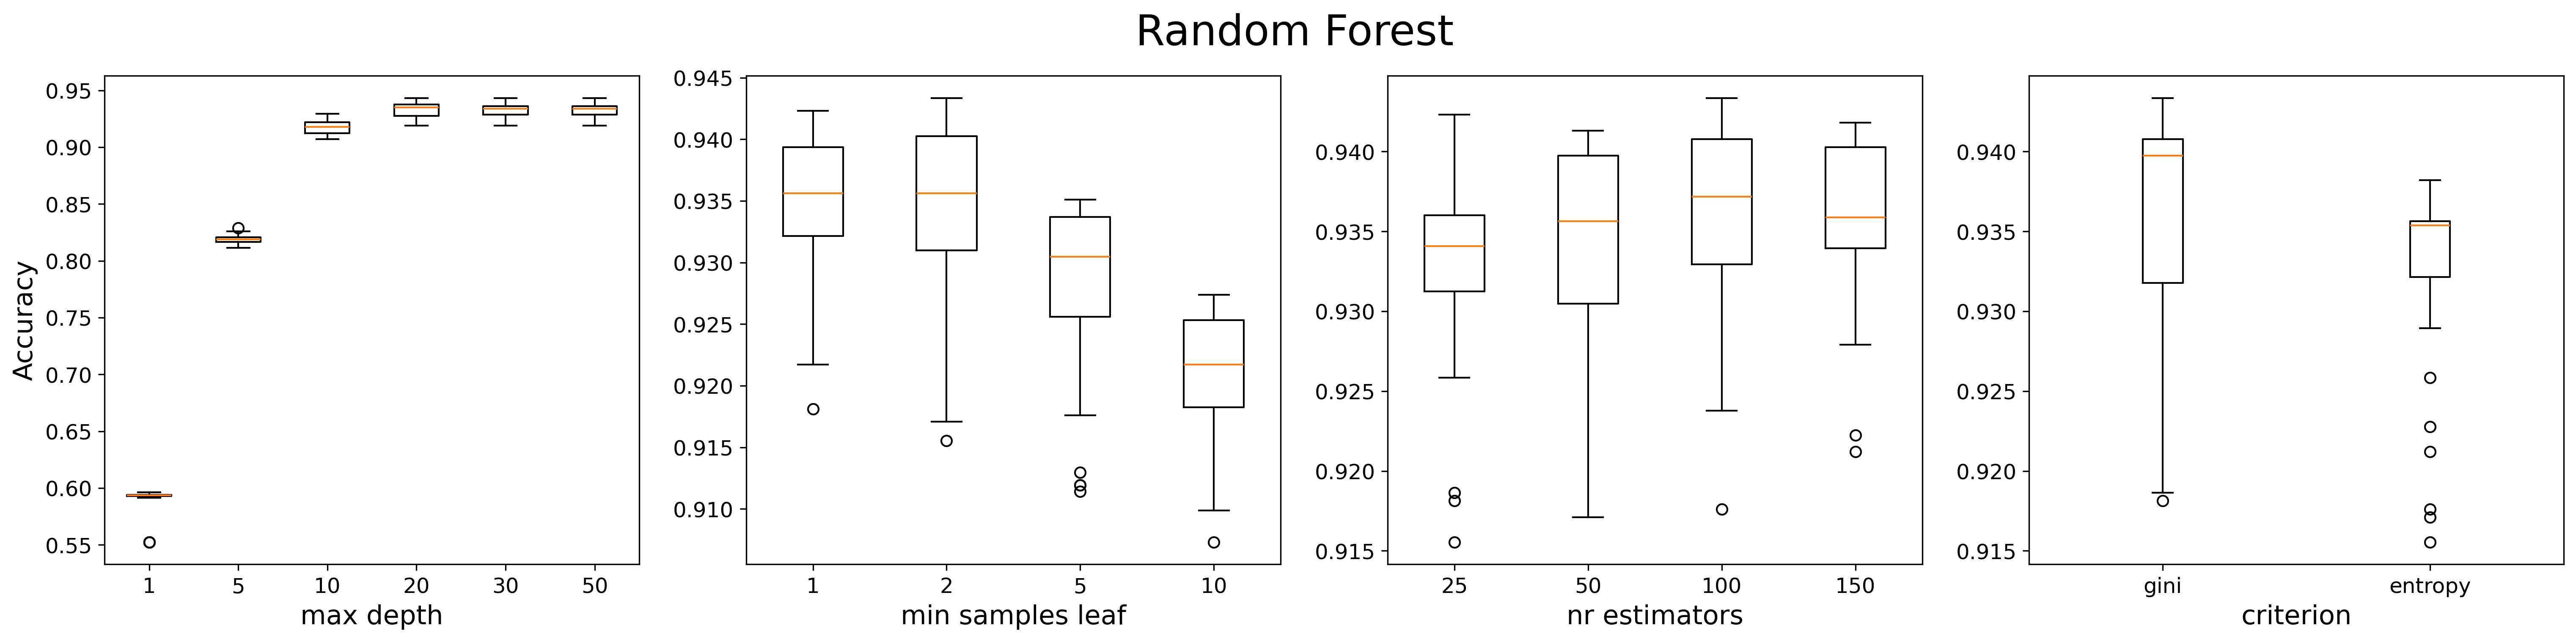

In [115]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (25, 5), dpi=300)

fig.suptitle('Random Forest', fontsize = 24)

ax[0].set_ylabel("Accuracy")

boxplot_4 = []
for i in range(accuracy_vector_RandomForest.shape[3]):
    boxplot_4.append(np.matrix.flatten(accuracy_vector_RandomForest[:,:,:,i]))
ax[0].boxplot(boxplot_4, labels = max_depth_list)
ax[0].set_xlabel(r"max depth")

boxplot_3 = []
for i in range(accuracy_vector_RandomForest.shape[2]):
    boxplot_3.append(np.matrix.flatten(accuracy_vector_RandomForest[:,:,i,[2,3,4,5]]))
ax[1].boxplot(boxplot_3, labels = min_samples_leaf_list)
ax[1].set_xlabel(r"min samples leaf")

boxplot_1 = []
for i in range(accuracy_vector_RandomForest.shape[0]):
    boxplot_1.append(np.matrix.flatten(accuracy_vector_RandomForest[i,:,:,[2,3,4,5]][...,[0,1]]))
ax[2].boxplot(boxplot_1, labels = n_estimators_list)
ax[2].set_xlabel(r"nr estimators")

boxplot_2 = []
for i in range(accuracy_vector_RandomForest.shape[1]):
    boxplot_2.append(np.matrix.flatten(accuracy_vector_RandomForest[:,i,:,[2,3,4,5]][...,[0,1]]))
ax[3].boxplot(boxplot_2, labels = criterion_list)
ax[3].set_xlabel(r"criterion")

fig.savefig('data/figures/boxplots_RandomForest.png', bbox_inches="tight", dpi = 300)

In [116]:
clf_RF = RandomForestClassifier( n_estimators     = n_estimators_list[max_index[0]], 
                              criterion        = criterion_list[max_index[1]], 
                              min_samples_leaf = min_samples_leaf_list[max_index[2]], 
                              max_depth        = max_depth_list[max_index[3]]
                            )

RF = clf_RF.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = RF.predict(X_test)
accuracy_score(y_test, y_pred)

0.9387229660144182

# Test set

In [117]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score

In [118]:
data = pd.read_excel("data/training.xlsx")

data = data.values[:,1:]

X = data[:,:-1].astype(float)

y = data[:,-1]

y = np.where(y=="E",      np.zeros(y.shape), y)
y = np.where(y=="L",  1 + np.zeros(y.shape), y)
y = np.where(y=="L ", 1 + np.zeros(y.shape), y)
y = np.where(y=="R",  2 + np.zeros(y.shape), y)
y = np.where(y=="S",  3 + np.zeros(y.shape), y)
y = np.where(y=="W",  4 + np.zeros(y.shape), y)

y = y.astype(int)

In [119]:
XGB       = clf_XGB.fit(X, y)
ExtraTree = clf_ExtraTree.fit(X, y)
LGBM      = clf_LGBM.fit(X, y)
RF        = clf_RF.fit(X, y)

In [120]:
data = pd.read_excel("data/test.xlsx")

data = data.values[:,1:]

X_final_test = data[:,:-1].astype(float)
y_final_test = data[:,-1]

y_final_test = np.where(y_final_test=="E",      np.zeros(y_final_test.shape), y_final_test)
y_final_test = np.where(y_final_test=="L",  1 + np.zeros(y_final_test.shape), y_final_test)
y_final_test = np.where(y_final_test=="L ", 1 + np.zeros(y_final_test.shape), y_final_test)
y_final_test = np.where(y_final_test=="R",  2 + np.zeros(y_final_test.shape), y_final_test)
y_final_test = np.where(y_final_test=="S",  3 + np.zeros(y_final_test.shape), y_final_test)
y_final_test = np.where(y_final_test=="W",  4 + np.zeros(y_final_test.shape), y_final_test)

y_final_test = y_final_test.astype(int)

In [121]:
total_points = np.sum(X_final_test[:,-3])
weights_points = X_final_test[:,-3]/total_points

total_volume = np.sum(X_final_test[:,-2])
weights_volume = X_final_test[:,-2]/total_volume

total_gauss_points_1000 = np.sum(np.exp(-0.5*np.square(X_final_test[:,-3])/1000000))
weights_gauss_points_1000 = np.exp(-0.5*np.square(X_final_test[:,-3])/1000000)/total_gauss_points_1000

total_gauss_points_10 = np.sum(np.exp(-0.5*np.square(X_final_test[:,-3])/100))
weights_gauss_points_10 = np.exp(-0.5*np.square(X_final_test[:,-3])/100)/total_gauss_points_10

# Predict the labels for the test set
y_pred_XGB = XGB.predict(X_final_test)
print("###########################################")
print("XGB")
print("Accuracy:", np.round(accuracy_score(y_final_test, y_pred_XGB), 3))
print("Balanced accuracy: ", np.round(balanced_accuracy_score(y_final_test, y_pred_XGB), 3))
print("Weighted F1-score: ", np.round(f1_score(y_final_test, y_pred_XGB, average='weighted'), 3))
print("MIOU(nr points):", np.round(accuracy_score(y_final_test, y_pred_XGB, sample_weight = weights_points), 3))
print("MIOU(volume):", np.round(accuracy_score(y_final_test, y_pred_XGB, sample_weight = weights_volume), 3))
print("MIOU(Gaussian kernel 1000):", np.round(accuracy_score(y_final_test, y_pred_XGB, sample_weight = weights_gauss_points_1000), 3))
print("MIOU(Gaussian kernel 10):", np.round(accuracy_score(y_final_test, y_pred_XGB, sample_weight = weights_gauss_points_10), 3))

# Predict the labels for the test set
y_pred_ExtraTree = ExtraTree.predict(X_final_test)
print("###########################################")
print("ExtraTree")
print("Accuracy:", np.round(accuracy_score(y_final_test, y_pred_ExtraTree), 3))
print("Balanced accuracy: ", np.round(balanced_accuracy_score(y_final_test, y_pred_ExtraTree), 3))
print("Weighted F1-score: ", np.round(f1_score(y_final_test, y_pred_ExtraTree, average='weighted'), 3))
print("MIOU(nr points):", np.round(accuracy_score(y_final_test, y_pred_ExtraTree, sample_weight = weights_points), 3))
print("MIOU(volume):", np.round(accuracy_score(y_final_test, y_pred_ExtraTree, sample_weight = weights_volume), 3))
print("MIOU(Gaussian kernel 1000):", np.round(accuracy_score(y_final_test, y_pred_ExtraTree, sample_weight = weights_gauss_points_1000), 3))
print("MIOU(Gaussian kernel 10):", np.round(accuracy_score(y_final_test, y_pred_ExtraTree, sample_weight = weights_gauss_points_10), 3))

# Predict the labels for the test set
y_pred_LGBM = LGBM.predict(X_final_test)
print("###########################################")
print("LGBM")
print("Accuracy:", np.round(accuracy_score(y_final_test, y_pred_LGBM), 3))
print("Balanced accuracy: ", np.round(balanced_accuracy_score(y_final_test, y_pred_LGBM), 3))
print("Weighted F1-score: ", np.round(f1_score(y_final_test, y_pred_LGBM, average='weighted'), 3))
print("MIOU(nr points):", np.round(accuracy_score(y_final_test, y_pred_LGBM, sample_weight = weights_points), 3))
print("MIOU(volume):", np.round(accuracy_score(y_final_test, y_pred_LGBM, sample_weight = weights_volume), 3))
print("MIOU(Gaussian kernel 1000):", np.round(accuracy_score(y_final_test, y_pred_LGBM, sample_weight = weights_gauss_points_1000), 3))
print("MIOU(Gaussian kernel 10):", np.round(accuracy_score(y_final_test, y_pred_LGBM, sample_weight = weights_gauss_points_10), 3))

# Predict the labels for the test set
y_pred_RF = RF.predict(X_final_test)
print("###########################################")
print("RF")
print("Accuracy:", np.round(accuracy_score(y_final_test, y_pred_RF), 3))
print("Balanced accuracy: ", np.round(balanced_accuracy_score(y_final_test, y_pred_RF), 3))
print("Weighted F1-score: ", np.round(f1_score(y_final_test, y_pred_RF, average='weighted'), 3))
print("MIOU(nr points):", np.round(accuracy_score(y_final_test, y_pred_LGBM, sample_weight = weights_points), 3))
print("MIOU(volume):", np.round(accuracy_score(y_final_test, y_pred_LGBM, sample_weight = weights_volume), 3))
print("MIOU(Gaussian kernel 1000):", np.round(accuracy_score(y_final_test, y_pred_LGBM, sample_weight = weights_gauss_points_1000), 3))
print("MIOU(Gaussian kernel 10):", np.round(accuracy_score(y_final_test, y_pred_LGBM, sample_weight = weights_gauss_points_10), 3))

###########################################
XGB
Accuracy: 0.873
Balanced accuracy:  0.857
Weighted F1-score:  0.871
MIOU(nr points): 0.993
MIOU(volume): 0.998
MIOU(Gaussian kernel 1000): 0.863
MIOU(Gaussian kernel 10): 0.841
###########################################
ExtraTree
Accuracy: 0.887
Balanced accuracy:  0.867
Weighted F1-score:  0.885
MIOU(nr points): 0.992
MIOU(volume): 0.998
MIOU(Gaussian kernel 1000): 0.879
MIOU(Gaussian kernel 10): 0.862
###########################################
LGBM
Accuracy: 0.864
Balanced accuracy:  0.847
Weighted F1-score:  0.863
MIOU(nr points): 0.993
MIOU(volume): 0.998
MIOU(Gaussian kernel 1000): 0.853
MIOU(Gaussian kernel 10): 0.846
###########################################
RF
Accuracy: 0.875
Balanced accuracy:  0.841
Weighted F1-score:  0.872
MIOU(nr points): 0.993
MIOU(volume): 0.998
MIOU(Gaussian kernel 1000): 0.853
MIOU(Gaussian kernel 10): 0.846


In [122]:
def back_to_class(y):

	return np.array(["E", "L", "R", "S", "W"])[y]

In [123]:
data = pd.read_excel("data/test.xlsx")
data.insert(len(data.columns), "pred_XGB",       back_to_class(y_pred_XGB))
data.insert(len(data.columns), "pred_ExtraTree", back_to_class(y_pred_ExtraTree))
data.insert(len(data.columns), "pred_LGBM",      back_to_class(y_pred_LGBM))
data.insert(len(data.columns), "pred_RF",        back_to_class(y_pred_RF))

data.to_excel("data/test_with_pred.xlsx", index=False)

## Ensemble method

In [125]:
XGB_pred = XGB.predict(X_final_test) 
ExtraTree_pred = ExtraTree.predict(X_final_test) 
LGBM_pred = LGBM.predict(X_final_test) 
RF_pred = RF.predict(X_final_test) 

predictions = np.stack((XGB_pred, ExtraTree_pred, LGBM_pred, RF_pred), axis = 1)
values      = np.unique(predictions)

boolean_check = np.expand_dims(predictions, axis = -1) == np.expand_dims(values, axis = (0, 1))
weights = np.expand_dims(np.expand_dims(np.array([1., 1., 1., 1.]), axis = 0), axis = -1)
ensemble_prediction_prob = np.mean(weights*boolean_check.astype(float), axis = -2)

Y_pred_ensemble = np.argmax(ensemble_prediction_prob, axis = 1)

accuracy_score(y_final_test, Y_pred_ensemble)

0.8754578754578755

# Neural Network

This part of the notebook requires an installation of tensorflow, follow the instructions from https://www.tensorflow.org/install

In [7]:
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

import tensorflow as tf

In [8]:
data = pd.read_excel("data/training.xlsx")

data = data.values[:,1:]

# Ideally we want to normalize the data to avoid over-under float issues 
X = data[:,:-1].astype(float)

y = data[:,-1]

y = np.where(y=="E",      np.zeros(y.shape), y)
y = np.where(y=="L",  1 + np.zeros(y.shape), y)
y = np.where(y=="L ", 1 + np.zeros(y.shape), y)
y = np.where(y=="R",  2 + np.zeros(y.shape), y)
y = np.where(y=="S",  3 + np.zeros(y.shape), y)
y = np.where(y=="W",  4 + np.zeros(y.shape), y)

y = y.astype(int)

In [12]:
# # Build the model
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(4096, activation='relu'),
#     # tf.keras.layers.Dropout(0.3),  # Add dropout with a dropout rate of 0.3 (you can adjust this value)
#     tf.keras.layers.Dense(4096, activation='relu'),
#     # tf.keras.layers.Dropout(0.3),  # Add dropout with a dropout rate of 0.3 (you can adjust this value)
#     tf.keras.layers.Dense(5, activation='softmax')
# ])

# # Compile the model
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# # Train the model
# model.fit(X, y, epochs=500) 

# model.save('NeuralNet.keras')

In [10]:
# File too big to be uploaded contact the authors if interested
model = tf.keras.models.load_model('NeuralNet.keras')

In [11]:
data = pd.read_excel("data/test.xlsx")

data = data.values[:,1:]

X_final_test = data[:,:-1].astype(float)
y_final_test = data[:,-1]

y_final_test = np.where(y_final_test=="E",      np.zeros(y_final_test.shape), y_final_test)
y_final_test = np.where(y_final_test=="L",  1 + np.zeros(y_final_test.shape), y_final_test)
y_final_test = np.where(y_final_test=="L ", 1 + np.zeros(y_final_test.shape), y_final_test)
y_final_test = np.where(y_final_test=="R",  2 + np.zeros(y_final_test.shape), y_final_test)
y_final_test = np.where(y_final_test=="S",  3 + np.zeros(y_final_test.shape), y_final_test)
y_final_test = np.where(y_final_test=="W",  4 + np.zeros(y_final_test.shape), y_final_test)

y_final_test = y_final_test.astype(int)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_final_test, y_final_test)
print(f"Test accuracy: {test_acc:.4f}")


86/86 [==============================] - 1s 5ms/step - loss: 3.0196 - accuracy: 0.7359
Test accuracy: 0.7359


# The effect of scaling the point clouds (preprocessing the data)

In [49]:
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

from lazypredict import LazyClassifier

In [53]:
data = pd.read_excel("data/training.xlsx")

data = data.values[:,1:]

y = data[:,-1]

index = np.where(~np.any(np.stack((data[:,-1]== "L", data[:,-1]== "L ", data[:,-1]== "S", data[:,-1]== "R"), axis = -1), axis = 1))[0]
index_big = np.where(np.any(np.stack((data[:,-1]== "L", data[:,-1]== "L ", data[:,-1]== "S", data[:,-1]== "R"), axis = -1), axis = 1))[0]

data = data[:,:-1].astype(float)
point_cloud_size = 3*np.sum(data[:,-3])
print("The big clusters are "+str(100*round(np.sum(data[index_big,-3])/np.sum(data[:,-3]), 2))+r"% of the entire point cloud.")

index_1000_10000   = np.where(np.all(np.stack((data[:,-3]>1000, data[:,-3]<10000), axis = -1), axis = -1))[0]
index_10000_100000 = np.where(np.all(np.stack((data[:,-3]>10000, data[:,-3]<100000), axis = -1), axis = -1))[0]
index_1000000      = np.where(data[:,-3]>100000)[0]

print("After the preprocessing we get a dataset that is  "+str(100*round((np.sum(np.round(data[index_1000_10000,-3]/10)) + np.sum(100*np.round(data[index_10000_100000,-3]/100)) + np.sum(100*np.round(data[index_1000000,-3]/1000)))/np.sum(data[:,-3]), 2))+r"% of the entire point cloud.")

The big clusters are 98.0% of the entire point cloud.
After the preprocessing we get a dataset that is  67.0% of the entire point cloud.


In [46]:
data[index_1000_10000,-3] = np.round(data[index_1000_10000,-3]/10)
data[index_10000_100000,-3] = np.round(data[index_10000_100000,-3]/100)
data[index_1000000,-3] = np.round(data[index_1000000,-3]/1000)

In [47]:
print("Using tabular data result in a memory consumption that is "+str(100*np.round(np.prod(data.shape)/np.sum(3*data[:,-3]), 4))+r"% of the one from the preprocessed point cloud, and just "+str(100*np.round(np.prod(data.shape)/point_cloud_size, 5))+r"% of the original point cloud.")


Using tabular data result in a memory consumption that is 2.13% of the one from the preprocessed point cloud, and just 0.1% of the original point cloud.


In [9]:
X = data.astype(float)

y = np.where(y=="E",      np.zeros(y.shape), y)
y = np.where(y=="L",  1 + np.zeros(y.shape), y)
y = np.where(y=="L ", 1 + np.zeros(y.shape), y)
y = np.where(y=="R",  2 + np.zeros(y.shape), y)
y = np.where(y=="S",  3 + np.zeros(y.shape), y)
y = np.where(y=="W",  4 + np.zeros(y.shape), y)

y = y.astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# Updated Line
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=True)

X_train_lazy, X_test_lazy, y_train_lazy, y_test_lazy = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

models, predictions = clf.fit(X_train_lazy, X_test_lazy, y_train_lazy, y_test_lazy)
models

 93%|█████████▎| 27/29 [00:02<00:00, 10.33it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000228 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2272
[LightGBM] [Info] Number of data points in the train set: 3171, number of used features: 9
[LightGBM] [Info] Start training from score -1.024775
[LightGBM] [Info] Start training from score -1.285295
[LightGBM] [Info] Start training from score -3.217615
[LightGBM] [Info] Start training from score -1.605033
[LightGBM] [Info] Start training from score -2.090540
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

100%|██████████| 29/29 [00:03<00:00,  7.51it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.93,0.91,None,0.93,0.17
LGBMClassifier,0.93,0.90,None,0.92,0.22
XGBClassifier,0.92,0.90,None,0.92,0.87
RandomForestClassifier,0.92,0.89,None,0.92,0.60
BaggingClassifier,0.90,0.87,None,0.90,0.15
LabelPropagation,0.89,0.85,None,0.89,0.27
LabelSpreading,0.89,0.85,None,0.89,0.50
DecisionTreeClassifier,0.87,0.83,None,0.87,0.03
ExtraTreeClassifier,0.85,0.82,None,0.85,0.01
